---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Mahmoud Hamdy Mahmoud Hashim"

# Part 1 PCA

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


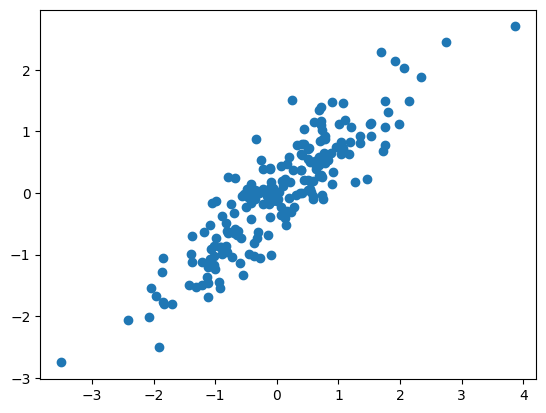

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [4]:
#### YOUR FUNCTION
def pca(X):
  # Calculate the mean of the data along each column aka: feature -> axis= 0
    meanPoint = X.mean(axis= 0)
    #Centring the data to the origin
    centerdData = X-meanPoint
    #Getting the covariance matrix
    cov_matrix = np.cov(centerdData.T)
    #Calculate the eigenvectors and the eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    #Sort the eigenvalues according to the max eigenvalues aka: max variance
    sorted_eigenvalue, sorted_eigenvectors = zip(*sorted(zip(eigenvalues, eigenvectors), reverse= True))
    #Trasform the data
    # X_transformed = []
    X_transformed = np.dot(centerdData, np.array(sorted_eigenvectors))

    # for i in range(len(sorted_eigenvectors)):
    #   X_transformed.append(np.dot(centerdData, sorted_eigenvectors[i]))
    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [5]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 

In [6]:
print("Eigenvalues are: ", sorted_eigenvalues)
# # # print("Eigenvalues are: ", sorted_eigenvectors)
# print(X_transformed)

Eigenvalues are:  (1.8292734341430152, 0.10246373184874935)


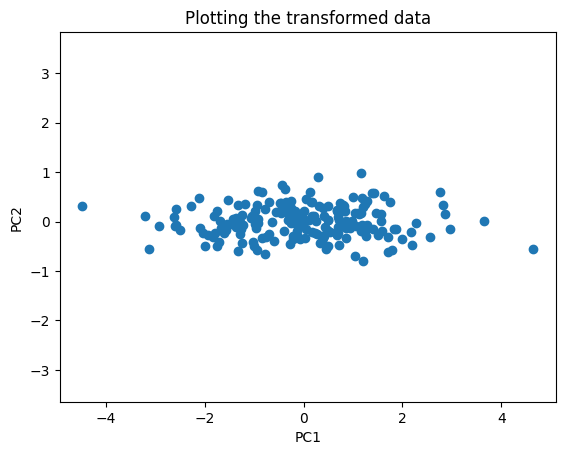

In [7]:
### Plot transformed data
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.title('Plotting the transformed data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal');

(-3.863983239446097, 4.234154625821966, -3.022935878792453, 2.976314246710253)

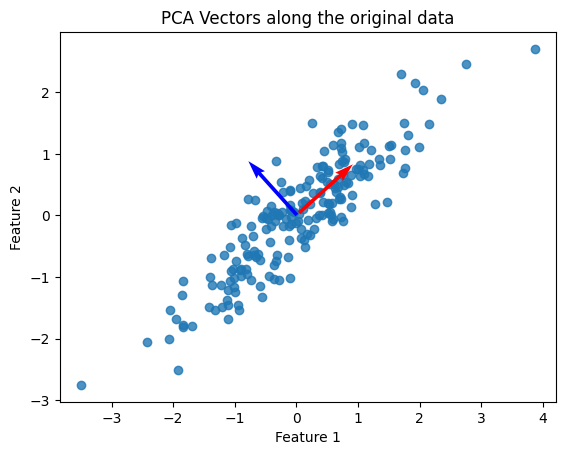

In [12]:
# ### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1], alpha= 0.8)
plt.quiver(X.mean(axis= 0), X.mean(axis= 0), sorted_eigenvectors[0], sorted_eigenvectors[1], color=['r','b']
           , angles='xy', scale_units='xy', 
           scale=0.85, label= 'PC1')

plt.title("PCA Vectors along the original data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

[1.82927343 0.10246373]


In [15]:
eig = pca.components_
eig

array([[ 0.74306799,  0.66921593],
       [-0.66921593,  0.74306799]])

## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [16]:
pca = PCA(n_components= 1)
transformed_data = pca.fit_transform(X)
print(pca.explained_variance_)
print('The shape of transformed data ',transformed_data.shape)

[1.82927343]
The shape of transformed data  (200, 1)


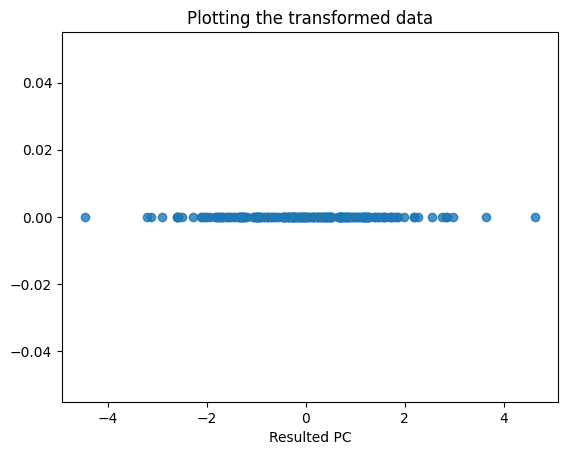

In [17]:
plt.scatter(transformed_data, [0]*transformed_data.shape[0], alpha= 0.8)
plt.title("Plotting the transformed data")
plt.xlabel("Resulted PC")
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [14]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)


#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [18]:
print(X_train.shape)
print(y_train.shape)


(80, 2)
(80,)


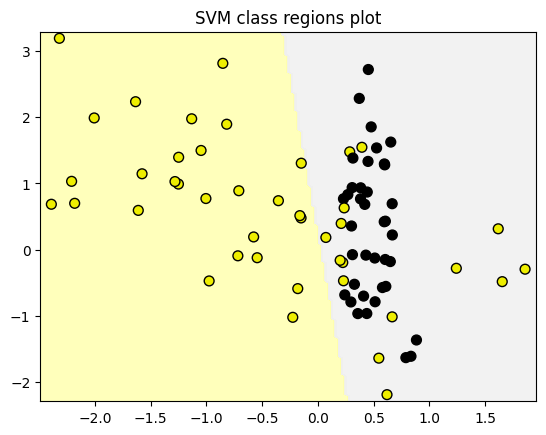

In [19]:
# plt.scatter(X_train[:,0], X_train[:, 1], c= y_train)
# plt.show()
plot_class_regions_for_classifier(svm, X_train, y_train, title='SVM class regions plot')

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

* Comment: As we can see the model with `c = 0.00002` is underfitted as it coudln't distinguish between the 2 classes, But by invreasing the c e.g: `c = 200` we observe that the model separates the classes very well it's quite similar when having `c = 1`, So we can conclude that the hyperparameter c is controlling the margin hyperplane then when c is relatively small `0.00002` the margin hyperplane is very large aka: wide so the model is considered to be soft margined and allows misclassification thus capturing all data with even the noise and considering them as a single class but when increasing the c `200` we can see that the margin hyperplane becomes a little tighter so the model becomes better and can predict kinda very well.

In [20]:
svm_0_00002 = SVC(kernel='linear', C=0.00002)
svm_0_00002.fit(X_train, y_train)

SVC(C=2e-05, kernel='linear')

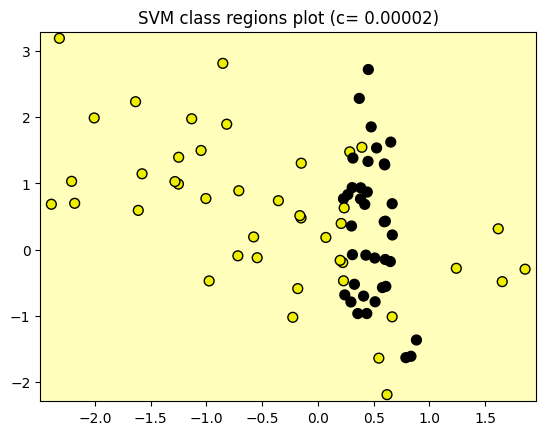

In [21]:
plot_class_regions_for_classifier(svm_0_00002, X_train, y_train, title='SVM class regions plot (c= 0.00002)')

In [22]:
svm_200 = SVC(kernel='linear', C=200)
svm_200.fit(X_train, y_train)

SVC(C=200, kernel='linear')

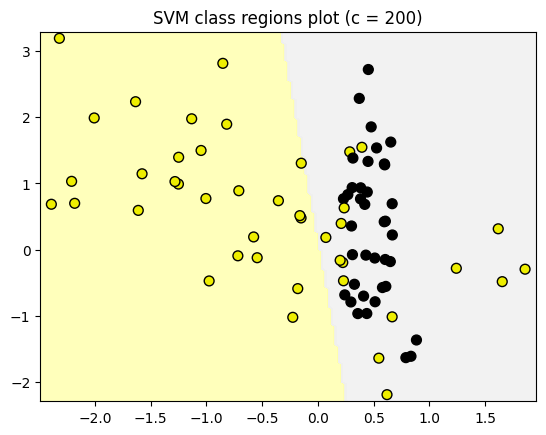

In [23]:
plot_class_regions_for_classifier(svm_200, X_train, y_train, title='SVM class regions plot (c = 200)')

### Use the fruits dataset in questions 4, 5, 6.

In [27]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [28]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [29]:
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
X_H_W = fruits[feature_names_fruits[:2]]

In [30]:
from sklearn.model_selection import train_test_split
X_HW_train, X_HW_test, y_HW_train, y_HW_test = train_test_split(X_H_W, y_fruits, random_state= 42, test_size= 0.2)

In [31]:
from sklearn.svm import LinearSVC

svm_Linear_svc = LinearSVC(C=10, random_state= 42)
svm_Linear_svc.fit(X_HW_train, y_HW_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
->Answer: As LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models. So it internally trains 4 SVM models
2. Print the models' coefficients and intercepts.

In [30]:
print("Coefficients:", svm_Linear_svc.coef_)
print("Intercept:", svm_Linear_svc.intercept_)

Coefficients: [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
Intercept: [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


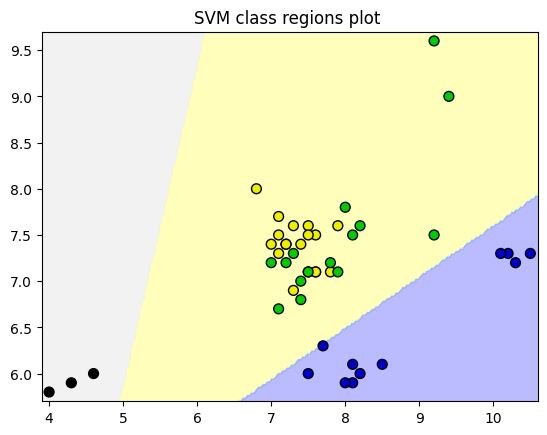

In [32]:
plot_class_regions_for_classifier(svm_Linear_svc, X_HW_train.values, y_HW_train.values, title='SVM class regions plot ')

In [18]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [19]:
from sklearn.model_selection import train_test_split
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_cancer, y_cancer, random_state= 42, test_size= 0.2)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svmModel = SVC()
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
grid_search = GridSearchCV(
    estimator=svmModel,
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    verbose=0
)

grid_search.fit(X_c_train, y_c_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'kernel': ('poly', 'rbf')},
             scoring='accuracy')

In [24]:
best_param = grid_search.best_params_
print('Best C: ', best_param['C'])
print('Best kernel: ', best_param['kernel'])

Best C:  10
Best kernel:  poly


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [25]:
svm_best = grid_search.best_estimator_
svm_best.fit(X_c_train, y_c_train)
print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_best.score(X_c_train, y_c_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(svm_best.score(X_c_test, y_c_test)))

Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

<Axes: >

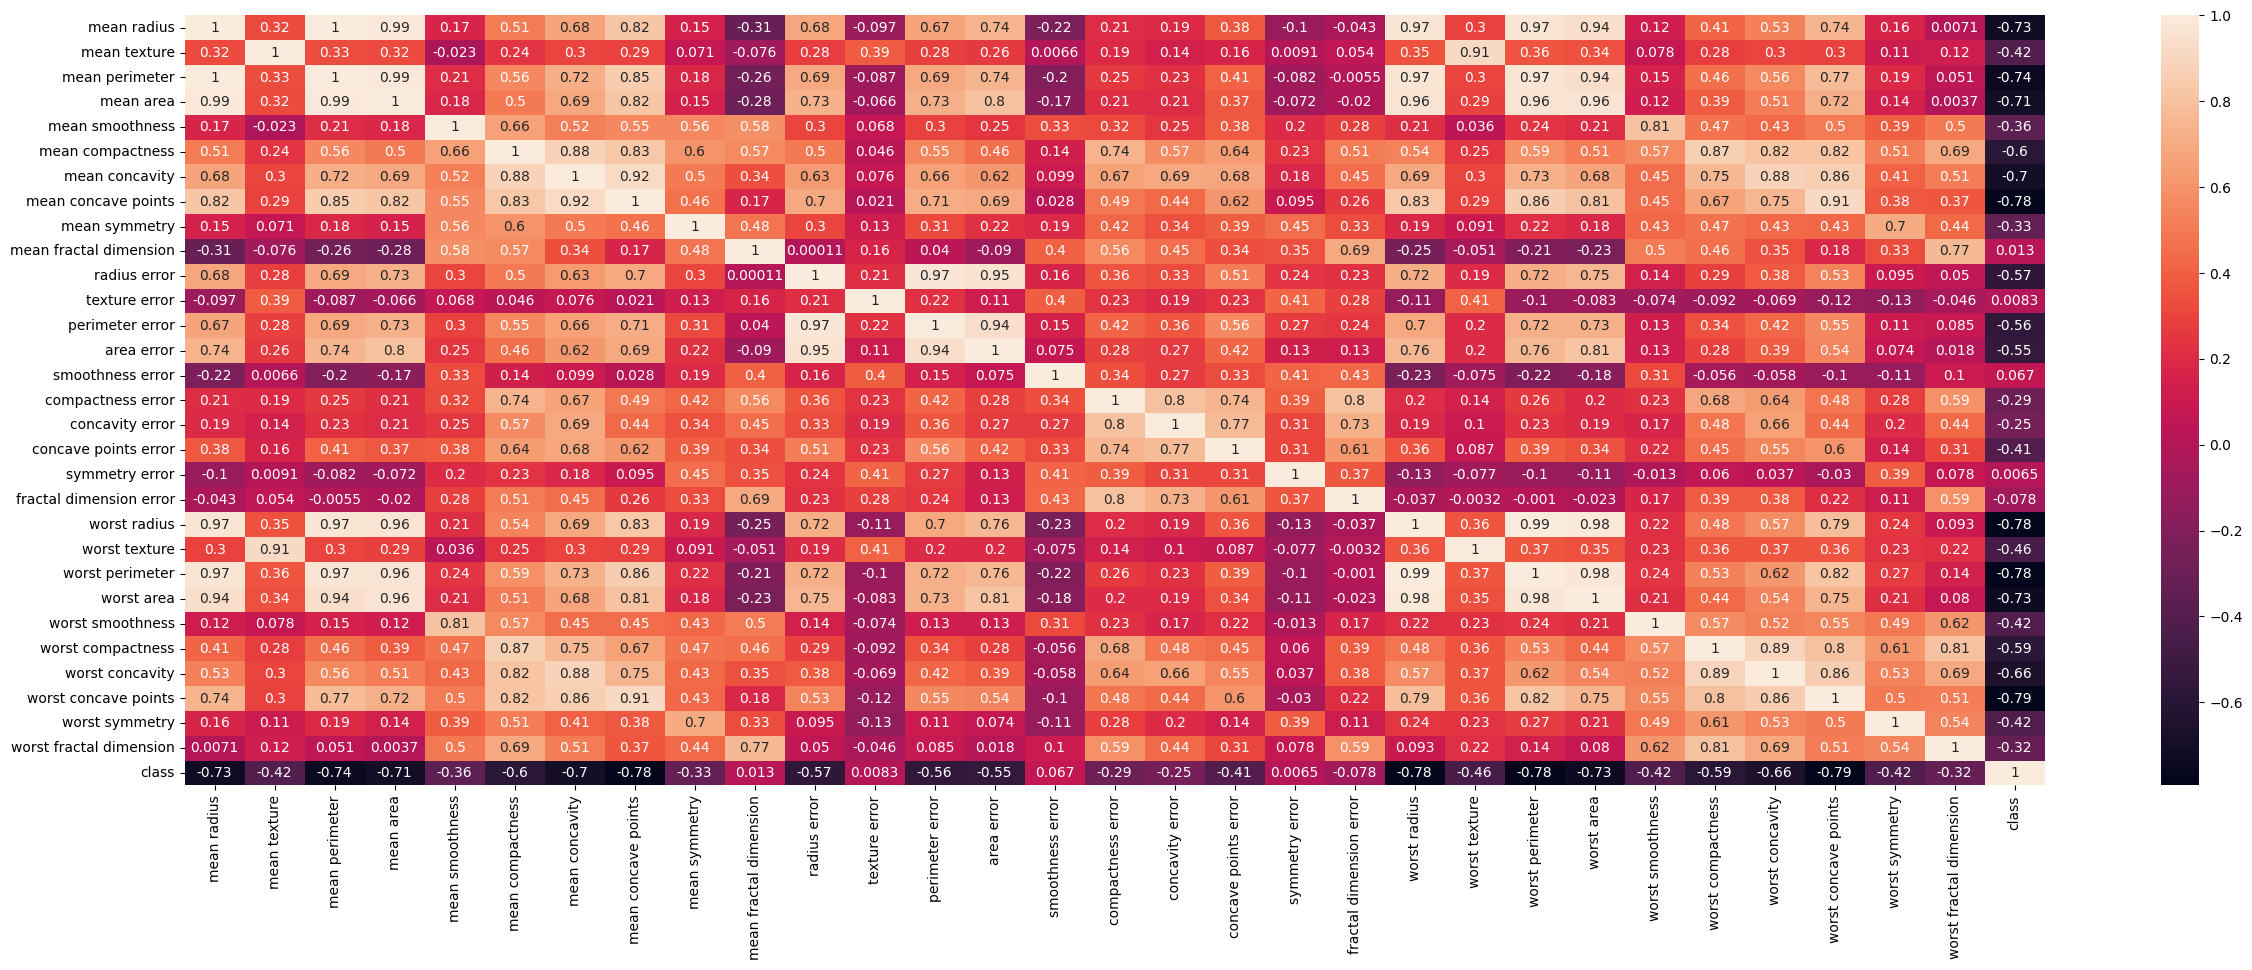

In [41]:
import seaborn as sns
import pandas as pd
data = load_breast_cancer()

data_pd = pd.DataFrame(data= data.data, columns= data.feature_names)
data_pd['class'] = data.target
ax, fig = plt.subplots(figsize=(30, 10))
sns.heatmap(data_pd.corr(), annot=True)

In [42]:
x = data_pd.copy().drop(['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error','fractal dimension error'], axis= 1) #It didn't give the optimal accuracy
# x = data_pd
y = x.pop('class')

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_standardized = scaler.fit_transform(x)
X__train, X__test, y__train, y__test = train_test_split(X_standardized, y, random_state= 42, test_size= 0.2)

In [44]:
svm_analysis = SVC(kernel= best_param['kernel'], C= best_param['C'])
svm_analysis.fit(X__train, y__train)

SVC(C=10, kernel='poly')

In [45]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_analysis.score(X__train,y__train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(svm_analysis.score(X__test,y__test)))

Accuracy of SVC on training set: 1.00
Accuracy of SVC on test set: 0.97
